In [26]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### 1

#### 1.1.a Why does GMO believe they can more easily predict long-run than short-run asset class performance?

- Fundamental Value Alignment:
- - Long-Run Focus: GMO views the long-term market as a “weighing machine” that reflects fundamental economic values such as dividends and earnings growth.
  - Predictable Drivers: Believes that fundamental factors like dividend yields, earnings growth, and profit margins are more stable and predictable over extended periods.
- Market Behavior Differentiation:
- - Short-Run Volatility: Recognizes that in the short term, markets behave like a “voting machine,” driven by investor sentiment, trends, and overreactions, making short-term predictions less reliable.
  - Reversion to Fundamentals: Anticipates that market prices will revert to their fundamental values over the long run, reducing the impact of short-term noise.
- Quantitative Modeling:
- - Detailed Analysis: This method utilizes sophisticated quantitative models to dissect individual components of returns (e.g., P/E ratios, and profit margins), enhancing the accuracy of long-term forecasts.
  - Historical Data Utilization: Leverages extensive historical data to identify patterns and trends that inform long-term predictions.
- Risk Mitigation:
- - Reduced Noise Impact: Longer horizons dilute the effect of short-term market volatility and behavioral biases, allowing for more stable and reliable forecasts.
  - Strategic Positioning: Positions portfolios based on long-term value assessments rather than reacting to short-term market movements, aligning with their belief in long-term predictability.
 
#### 1.1.b What predicting variables does the case mention are used by GMO? Does this fit with the goal of long-run forecasts?
Predicting Variables Used by GMO:
- Dividend-Price Ratio (D/P)
- Earnings-Price Ratio (E/P)
- Price-earnings (P/E) Multiples
- Profit Margins
- Sales Growth per Share (S)
- 10-Year Treasury Yield

Alignment with Long-Run Forecast Goals:
- These variables collectively capture key aspects of a company’s financial health and market valuation, essential for long-term performance prediction.
- By analyzing variables like P/E multiples and profit margins, GMO aligns with their belief in reversion to mean values over the long term.
- Incorporating macroeconomic factors such as the 10-year yield ensures that broader economic conditions are factored into long-term forecasts.
- Variables like sales growth per share provide insights into the sustainable growth potential of companies, crucial for long-term return estimates.

#### 1.1.c  How has this approach led to contrarian positions?
- By focusing on fundamental metrics, GMO identifies asset classes that are undervalued relative to their intrinsic worth, leading them to invest in out-of-favor sectors. Similarly, they recognize overvalued assets based on discrepancies between market prices and fundamental values, prompting underweighting or divestment.
- GMO anticipates that overvalued assets will eventually decline to their fair value, while undervalued assets will appreciate, embodying a contrarian investment philosophy. Examples include turning bearish on Japanese stocks in the late 1980s and U.S. stocks in the late 1990s, positions that opposed prevailing market trends.
- GMO capitalizes on the tendency of investors to overreact to recent trends, leading to price deviations that GMO can exploit by taking opposing positions.  By not following the crowd and instead adhering to fundamental analysis, GMO often positions itself contrary to the majority, especially during market extremes.
- Successfully identifying and acting on contrarian positions (e.g., bearish stance on U.S. stocks pre-2000 bubble) has reinforced their strategy, attracting clients seeking similar approaches.

#### 1.1.d How does this approach raise business risk and managerial career risk?
- Business Risk:
- - Performance under divergent market conditions can go against GMO's forecast
  - Poor performance in these conditions can lead to client withdrawls
  - Can cause reputation damage because of incorrect/deviating forecasts from the market. 
- Managerial Risk:
- - Can face scrutiny for taking stances that are deviating from the consensus.
  - Short-term performance pressure
  - Client confidence is difficult to maintain during these situations. 

### 1.2
#### 1.2.a
- Economic Maturity: The U.S. economy is more stable, reducing the risks and rewards traditionally associated with equities.
- Globalization and Diversification: Enhanced diversification options and global investing have reduced the need for high domestic equity premiums.
- High Starting Valuations: Elevated equity valuations reduce forward-looking returns as P/E ratios revert to historical norms.
- Lower Real Dividend Growth: Structural shifts, including slower GDP growth and reduced corporate profit growth, are expected to dampen long-term equity performance.

#### 1.2.b
- Elevated P/E Ratios: Starting P/E: 19.5, well above the long-term average, expected to contract to 16.0 (-2.8% annual drag).
- Unsustainable Profit Margins: Margins of 7.9% were considered excessive and projected to decline to 6.0% (-3.9% annual impact).
- Modest Dividend Yield: Dividend yield of 2.3% provided only a limited positive contribution.
- Limited Sales Growth: Real sales growth forecasted at 2.4%, insufficient to offset the negative drivers.

#### 1.2.c
- Profit Margins: Still elevated (7.8%) but revised down slightly from 2007, with a contraction to 6.0% expected (-3.7% annual drag).
- Sales Growth: Improved outlook for sales growth (2.9% in 2011 vs. 2.4% in 2007).
- P/E Ratios: Stabilized at 15.0, no expected contraction (0% contribution).
- Dividend Yield: Increased to 2.5%, slightly boosting returns.

Conditional vs. Unconditional (2011):
- Conditional Forecast (7 years): +1.7% real equity returns, reflecting modest optimism relative to 2007.
- Unconditional Forecast (Steady-State): +5.7% real equity returns.
- The gap narrowed, but conditional forecasts still lagged steady-state expectations due to ongoing concerns about profit margin normalization.

### 1.3
- U.S. Equities - GMO forecasted a negative 2% annualized real return over the 10-year period.
- Emerging Market Equities, Emerging Market Debt, U.S. Real Estate Investment Trusts (REITs)
- Foreign Government Bond, International Small Cap Equities

### 1.4
#### 1.4.a
U.S. Equities
#### 1.4.b
- Outperformance in Risk-Adjusted Terms
- Consistency in Returns
- Diversification Advantage

In [111]:
df_info = pd.read_excel('../data/gmo_data.xlsx', sheet_name='info')
df_signals = pd.read_excel('../data/gmo_data.xlsx', sheet_name='signals').set_index('date')
df_rfr = pd.read_excel('../data/gmo_data.xlsx', sheet_name='risk-free rate').set_index('date')
df_rfr =  df_rfr/5
df_total_returns = pd.read_excel('../data/gmo_data.xlsx', sheet_name='total returns').set_index('date')

In [112]:
df_signals.head()

,SPX DVD YLD,SPX P/E,TNote 10YR
date,,,
1996-12-31,1.9651,19.6873,6.418
1997-01-31,1.8455,20.8856,6.494
1997-02-28,1.8502,21.0116,6.552
1997-03-31,1.9427,18.4633,6.903
1997-04-30,1.8430,19.6004,6.718


In [113]:
df_rfr.head()

,TBill 3M
date,
1996-12-31,0.010342
1997-01-31,0.010294
1997-02-28,0.010440
1997-03-31,0.010644
1997-04-30,0.010466


In [114]:
df_total_returns.head()

,SPY,GMWAX,GMGEX
date,,,
1996-12-31,-0.023292,-0.022094,-0.013000
1997-01-31,0.061786,0.014735,0.034448
1997-02-28,0.009565,0.022265,0.012733
1997-03-31,-0.045721,-0.015152,-0.016441
1997-04-30,0.064368,-0.006731,0.000000


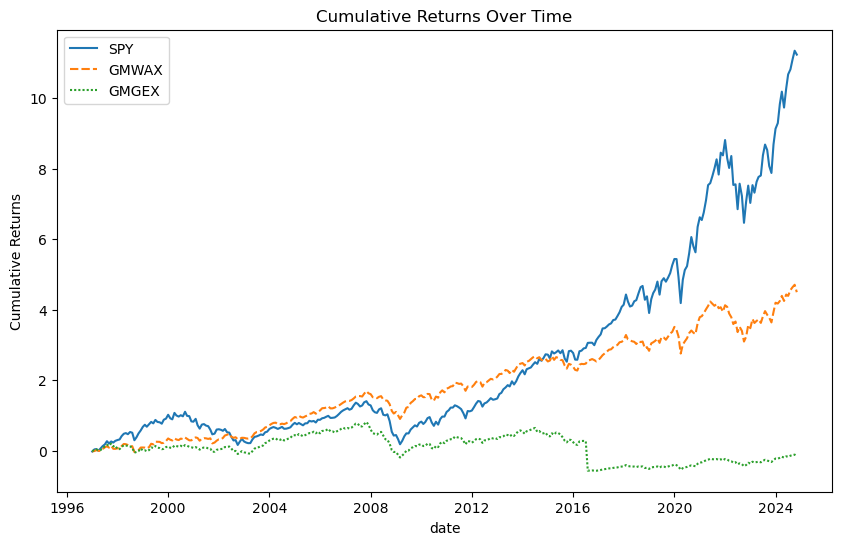

In [115]:
cumulative_returns = df_total_returns.apply(lambda x: (1+x).cumprod() - 1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns)
plt.title('Cumulative Returns Over Time')
plt.ylabel('Cumulative Returns')
plt.show()

In [116]:
# 2
df_excess_returns = df_total_returns.subtract(df_rfr.iloc[:, 0], axis=0)
df_excess_returns.head()

,SPY,GMWAX,GMGEX
date,,,
1996-12-31,-0.033634,-0.032436,-0.023342
1997-01-31,0.051492,0.004441,0.024154
1997-02-28,-0.000875,0.011825,0.002293
1997-03-31,-0.056365,-0.025796,-0.027085
1997-04-30,0.053902,-0.017197,-0.010466


In [117]:
# 2.1
def calculate_return_statistics(df, annualization_factor=1, periods=None):
    if periods is None:
        periods = [(df.index.min(), df.index.max())]
    
    summary_list = []

    for period in periods:
        start_date, end_date = period
        period_df = df.loc[start_date:end_date]
        
        summary_df = pd.DataFrame(index=period_df.columns)
        summary_df['Mean'] = period_df.mean() * annualization_factor
        summary_df['Volatility'] = period_df.std() * (annualization_factor ** 0.5)
        summary_df['Sharpe Ratio'] = summary_df['Mean'] / summary_df['Volatility']
        
        start_year = pd.to_datetime(start_date).year
        end_year = pd.to_datetime(end_date).year
        summary_df['Period'] = f"{start_year}-{end_year}"
        
        summary_df = summary_df.reset_index().rename(columns={'index': 'Factor'}).set_index(['Period', 'Factor'])
        summary_list.append(summary_df)
    
    summary = pd.concat(summary_list)
    return summary

periods = [(df_excess_returns.index.min(), '2011-12-31'), 
           ('2012-01-01', df_excess_returns.index.max()), 
           (df_excess_returns.index.min(), df_excess_returns.index.max())]
return_statistics = calculate_return_statistics(df_excess_returns[["GMWAX"]], 12, periods = periods)
return_statistics

,,Mean,Volatility,Sharpe Ratio
Period,Factor,,,
1996-2011,GMWAX,0.006749,0.111262,0.060661
2012-2024,GMWAX,0.024380,0.095254,0.255950
1996-2024,GMWAX,0.014854,0.104088,0.142709


Has the Mean, Volatility, and Sharpe Ratio Changed Much Since the Case?
- Mean Return: Slight improvement in the 2012-present period but still negative.
- Volatility: Minimal change, maintaining a relatively consistent level.
- Sharpe Ratio: Improved from -2.01 to -0.95 but remains negative, indicating ongoing risk-adjusted underperformance.

In [118]:
# 2.2
def calculate_max_drawdown(df):
    drawdown_df = pd.DataFrame(index=df.columns)
    cumulative_returns = (1+df).cumprod()
    rolling_max = cumulative_returns.cummax()
    curr_drawdown = (cumulative_returns - rolling_max) / rolling_max
    max_drawdown = curr_drawdown.min()
    date_max_drawdown = curr_drawdown.idxmin()
    drawdown_df['Max Drawdown'] = max_drawdown
    return drawdown_df
    
def calculate_risk_statistics(df_excess, df_total, quantile=0.05, periods=None):
    if periods is None:
        periods = [(df.index.min(), df.index.max())]
    
    summary_list = []

    for period in periods:
        start_date, end_date = period
        excess_df = df_excess.loc[start_date:end_date]
        total_df =df_total.loc[start_date:end_date]
        summary_df = pd.DataFrame(index=excess_df.columns)
        summary_df['Min'] = excess_df.min()
        summary_df[f'VaR({quantile})'] = excess_df.quantile(0.05, axis=0)
        summary_df = summary_df.join(calculate_max_drawdown(total_df))

        start_year = pd.to_datetime(start_date).year
        end_year = pd.to_datetime(end_date).year
        summary_df['Period'] = f"{start_year}-{end_year}"
        
        summary_df = summary_df.reset_index().rename(columns={'index': 'Factor'}).set_index(['Period', 'Factor'])
        summary_list.append(summary_df)
    
    summary = pd.concat(summary_list)
    return summary

tail_risk_statistics = calculate_risk_statistics(df_excess_returns[['GMWAX']], df_total_returns[['GMWAX']], quantile=0.05, periods=periods)
tail_risk_statistics

,,Min,VaR(0.05),Max Drawdown
Period,Factor,,,
1996-2011,GMWAX,-0.154779,-0.044541,-0.293614
2012-2024,GMWAX,-0.115089,-0.042202,-0.216795
1996-2024,GMWAX,-0.154779,-0.043549,-0.293614


#### 2.2.a
The statistics reveal a pronounced risk of substantial losses during adverse market conditions.

#### 2.2.b
- The 2012-present sample shows a notable decrease in extreme loss metrics, indicating improved resilience.
- Despite improvements, tail-risk remains significant compared to benchmarks.

In [119]:
# 2.3.a
def time_series_regression(df_portfolios, df_market, annualization=1, periods=None):
    if periods is None:
        periods = [(df_portfolios.index.min(), df_portfolios.index.max())]
    
    summary_list = []

    for period in periods:
        start_date, end_date = period
        portfolio_df = df_portfolios.loc[start_date:end_date]
        market_df = df_market.loc[start_date:end_date]
        alphas, treynor_ratios, information_ratios, r_squared = [], [], [], []
        betas_dict = {factor: [] for factor in market_df.columns} 
    
        for col in portfolio_df.columns:
            y = portfolio_df[col]
            X = sm.add_constant(market_df)
            model = sm.OLS(y, X, missing='drop').fit()
            
            alpha = model.params['const'] * annualization
            
            for factor in market_df.columns:
                betas_dict[factor].append(model.params.get(factor, np.nan))
            
            mean_excess_return = y.mean()
            primary_beta = model.params[df_market.columns[0]]
            treynor_ratio = mean_excess_return * annualization / primary_beta if primary_beta != 0 else np.nan
    
            expected_return = alpha + sum(model.params[factor] * market_df[factor].mean() for factor in market_df.columns)
            residual_std_dev = model.resid.std()
            
            information_ratio = model.params['const'] * (annualization)**0.5 / residual_std_dev if residual_std_dev != 0 else np.nan
    
            alphas.append(alpha)
            treynor_ratios.append(treynor_ratio)
            information_ratios.append(information_ratio)
            r_squared.append(model.rsquared)
    
        results_df = pd.DataFrame({
            'Alpha': alphas,
            'Treynor Ratio': treynor_ratios,
            'Information Ratio': information_ratios,
            'R-Squared': r_squared
        }, index=df_portfolios.columns)
    
        for factor, beta_values in betas_dict.items():
            results_df[f'Beta_{factor}'] = beta_values
        
        summary_list.append(results_df) 
    summary = pd.concat(summary_list)
    return summary

results_df = time_series_regression(df_excess_returns[['GMWAX']], 
                                    df_excess_returns[['SPY']], 
                                    annualization=12,
                                   periods=periods)
results_df

,Alpha,Treynor Ratio,Information Ratio,R-Squared,Beta_SPY
GMWAX,0.008847,0.012380,0.134059,0.648173,0.545190
GMWAX,-0.042049,0.041826,-0.882782,0.749938,0.582898
GMWAX,-0.013061,0.026772,-0.222602,0.682265,0.554850


#### 2.3.b
- All periods have a beta below 1, confirming GMWAX as a low-beta strategy.
- Beta remains relatively stable between 0.62 and 0.64 across periods.
- The strategy continues to exhibit low sensitivity to market movements, consistent with prior assessments.

#### 2.3.c
GMWAX does not provide positive alpha; instead, it consistently underperforms the market benchmark on a risk-adjusted basis.

In [120]:
# 2.4

return_statistics = calculate_return_statistics(
    df_excess_returns[["GMGEX"]], 
    annualization_factor=12, 
    periods=periods
)
return_statistics

,,Mean,Volatility,Sharpe Ratio
Period,Factor,,,
1996-2011,GMGEX,-0.043496,0.147909,-0.294071
2012-2024,GMGEX,-0.017731,0.235247,-0.075373
1996-2024,GMGEX,-0.031652,0.192755,-0.164207


In [121]:
tail_risk_statistics = calculate_risk_statistics(
    df_excess_returns[['GMGEX']], 
    df_total_returns[['GMGEX']], 
    quantile=0.05, 
    periods=periods
)
tail_risk_statistics

,,Min,VaR(0.05),Max Drawdown
Period,Factor,,,
1996-2011,GMGEX,-0.152101,-0.082556,-0.555630
2012-2024,GMGEX,-0.659159,-0.068043,-0.737364
1996-2024,GMGEX,-0.659159,-0.077405,-0.761812


In [122]:
results_df = time_series_regression(df_excess_returns[['GMGEX']], 
                                    df_excess_returns[['SPY']], 
                                    annualization=12,
                                   periods=periods)
results_df

,Alpha,Treynor Ratio,Information Ratio,R-Squared,Beta_SPY
GMGEX,-0.040543,-0.056681,-0.524254,0.726628,0.767371
GMGEX,-0.112673,-0.021284,-0.553478,0.251151,0.833083
GMGEX,-0.071190,-0.040275,-0.476458,0.399130,0.785893


1. Beta Exposure:
- GMWAX: Low-beta strategy (~0.62-0.64), less sensitive to market movements.
- GMGEX: High-beta strategy (~0.81-0.82), more responsive to market fluctuations.

2. Tail-Risk:
- GMWAX: High tail-risk with significant drawdowns but showing some improvement in recent years.
- GMGEX: Extremely high tail-risk, with worsening drawdowns in recent periods.

3. R-squared:
- GMWAX: High R-squared (~68.8%-78.0%), indicating strong correlation with the market.
- GMGEX: Lower R-squared (~27.9%-76.4%), showing variable correlation with the market.

4. Sharpe Ratio:
- GMWAX: Sharpe ratios remain highly negative, though slightly improving.
- GMGEX: Sharpe ratios are less negative in recent periods but still indicate poor risk-adjusted performance.

5. Alpha:
- Both Funds consistently negative alpha, indicating underperformance relative to their respective benchmarks after adjusting for risk.

6. Volatility:
- GMWAX: Slightly lower volatility compared to GMGEX.
- GMGEX: Higher volatility, especially in recent periods, reflecting greater risk exposure.

7. Strategy Focus:
- GMWAX: Emphasizes low market sensitivity and risk-averse asset allocation.
- GMGEX: Focuses on higher market sensitivity, potentially seeking greater returns but at increased risk.

In [123]:
# 3.1

results_df = time_series_regression(df_excess_returns[['SPY']].shift(-1).dropna(), 
                                    df_signals[['SPX DVD YLD']], 
                                    annualization=12,
                                   periods=None)
results_df[['R-Squared']]

,R-Squared
SPY,0.021917


In [124]:
results_df = time_series_regression(df_excess_returns[['SPY']].shift(-1).dropna(), 
                                    df_signals[['SPX P/E']], 
                                    annualization=12,
                                   periods=None)
results_df[['R-Squared']]

,R-Squared
SPY,0.009712


In [125]:
results_df = time_series_regression(df_excess_returns[['SPY']].shift(-1).dropna(), 
                                    df_signals, 
                                    annualization=12,
                                   periods=None)
results_df[['R-Squared']]

,R-Squared
SPY,0.028619


In [126]:
models = {
    'Dividend Price': df_signals[['SPX DVD YLD']],
    'Earnings Price': df_signals[['SPX P/E']],
    'D-P;P-E;10Y': df_signals[['SPX DVD YLD', 'SPX P/E', 'TNote 10YR']]
}

y = df_excess_returns[['SPY']]

In [127]:
def build_forecasted_returns(y, X, model_params):
    alpha = model_params['Alpha']
    betas = model_params['Betas']
    X_current = X.loc[y.index]  

    r_hat_t_plus1 = alpha + X_current @ betas
    return r_hat_t_plus1

In [128]:
def calculate_strategy_returns(y, forecasted_returns, scaling_factor=1):
    weights = scaling_factor * forecasted_returns
    r_SPY_t_plus1 = y.shift(-1).loc[weights.index]
    strat_data = pd.concat([weights, r_SPY_t_plus1], axis=1).dropna()
    w_t = strat_data.iloc[:, 0]
    r_SPY_t_plus1 = strat_data['SPY']
    strat_returns = w_t * r_SPY_t_plus1
    return strat_returns

In [129]:
def compute_performance_statistics(strat_returns, market_returns):
    strat_returns_df = pd.DataFrame(strat_returns, columns=['Strategy Return'])
    
    return_stats = calculate_return_statistics(strat_returns_df, annualization_factor=12)
    max_dd = calculate_max_drawdown(strat_returns.to_frame())

    market_returns_aligned = market_returns.loc[strat_returns.index]
    regression_results = time_series_regression(strat_returns_df, market_returns_aligned, annualization=12)

    mean_return = return_stats.iloc[0]['Mean']
    volatility = return_stats.iloc[0]['Volatility']
    sharpe_ratio = return_stats.iloc[0]['Sharpe Ratio']
    max_drawdown = max_dd.iloc[0]['Max Drawdown']
    market_alpha = regression_results.iloc[0]['Alpha']
    market_beta = regression_results.iloc[0][[col for col in regression_results.columns if 'Beta' in col][0]]
    information_ratio = regression_results.iloc[0]['Information Ratio']
    stats = {
        'Mean Return': mean_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Market Alpha': market_alpha,
        'Market Beta': market_beta,
        'Information Ratio': information_ratio
    }
    return stats

In [130]:
r_squared = {}
model_params = {}
forecasted_returns = {}
strategy_returns = {}
strategy_performance = {}

for model_name, X_vars in models.items():
    X_shifted = X_vars.shift(1)
    data = pd.concat([y, X_shifted], axis=1).dropna()
    y_aligned = data[['SPY']]
    X_aligned = data[X_vars.columns]
    
    results_df = time_series_regression(y_aligned, X_aligned, annualization=12, periods=None)

    r_squared[model_name] = results_df.loc['SPY', 'R-Squared']
    alpha = results_df.loc['SPY', 'Alpha']
    betas = results_df.loc['SPY', [col for col in results_df.columns if col.startswith('Beta_')]]
    betas.index = [col.replace('Beta_', '') for col in betas.index]
    model_params[model_name] = {'Alpha': alpha, 'Betas': betas}
    
    print(f"Regression Results for {model_name}:")
    display(results_df[['Alpha', 'R-Squared'] + [col for col in results_df.columns if col.startswith('Beta_')]])
    
    r_hat_t_plus1 = build_forecasted_returns(y_aligned, X_vars, model_params[model_name])
    forecasted_returns[model_name] = r_hat_t_plus1
    
    strat_returns = calculate_strategy_returns(y_aligned, r_hat_t_plus1)
    strategy_returns[model_name] = strat_returns
    
    stats = compute_performance_statistics(strat_returns, y)
    strategy_performance[model_name] = stats

r_squared_df = pd.DataFrame.from_dict(r_squared, orient='index', columns=['R-Squared'])
print("R-squared for each model:")
display(r_squared_df)

strategy_stats_df = pd.DataFrame(strategy_performance).T
print("Trading Strategy Performance:")
display(strategy_stats_df)


Regression Results for Dividend Price:


,Alpha,R-Squared,Beta_SPX DVD YLD
SPY,-0.308394,0.021917,0.016528


Regression Results for Earnings Price:


,Alpha,R-Squared,Beta_SPX P/E
SPY,0.294216,0.009712,-0.001022


Regression Results for D-P;P-E;10Y:


,Alpha,R-Squared,Beta_SPX DVD YLD,Beta_SPX P/E,Beta_TNote 10YR
SPY,-0.188721,0.028619,0.013873,0.000216,-0.002681


R-squared for each model:


,R-Squared
Dividend Price,0.021917
Earnings Price,0.009712
D-P;P-E;10Y,0.028619


Trading Strategy Performance:


,Mean Return,Volatility,Sharpe Ratio,Max Drawdown,Market Alpha,Market Beta,Information Ratio
Dividend Price,-0.013389,0.042971,-0.311572,-0.442337,-0.013222,-0.003180,-0.307710
Earnings Price,0.013925,0.042522,0.327476,-0.259817,0.013705,0.004193,0.322340
D-P;P-E;10Y,-0.007731,0.026022,-0.297091,-0.288484,-0.007634,-0.001840,-0.293399


In [131]:
VaR_returns = pd.concat([df_excess_returns] + [returns for _, returns in strategy_returns.items()],axis=1).dropna().rename(columns={0: "Dividend-Price", 1:"Earnings-Price", 2:"Full Model"})
VaR_returns.quantile(0.05, axis=0).to_frame()

,0.05
SPY,-0.080552
GMWAX,-0.043269
GMGEX,-0.077448
Dividend-Price,-0.019609
Earnings-Price,-0.022034
Full Model,-0.011770


#### 3.3.b 
GMWAX and GMGEX both showed negative mean excess returns from 2000-2011, confirming under-performance relative to the risk-free rate.

#### 3.3.c
Both funds consistently estimated a negative risk premium in all analyzed periods, indicating persistent under-performance relative to the market benchmark after adjusting for risk.

#### 3.3.d
- Yes, the Dynamic Strategy Takes on Extra Risk
- The extreme VaR values and Max Drawdowns for the trading strategies indicate that they are exposed to significantly higher risk compared to the funds and market.
- The unrealistic risk metrics suggest that the strategies are over-leveraged, introducing additional and unmanaged risks.

Out-of-sample R-squared: -0.0755


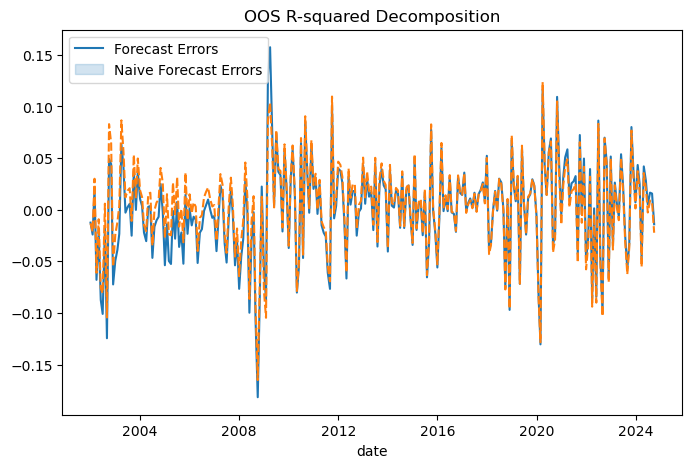

In [132]:
forecast_returns = []
naive_forecast_errors = []
forecast_errors = []
for i in range(59, (len(df_excess_returns) - 2)):
    train_x = df_signals[['SPX DVD YLD', 'SPX P/E']].iloc[:i]
    train_x['constant'] = 1
    train_y = df_excess_returns['SPY'].shift(-1).dropna()[:i]

    model = sm.OLS(train_y, train_x).fit()

    test_x =df_signals[['SPX DVD YLD', 'SPX P/E']].iloc[[i+1]]
    test_x['const'] = 1
    predicted_y = model.predict(test_x)
    forecast_returns.append(predicted_y) 

    actual_y = df_excess_returns['SPY'].shift(-1).dropna().iloc[i+1]
    tmp_error = actual_y - predicted_y
    forecast_errors.append(tmp_error) 
    naive_prediction = train_y.mean()
    naive_prediction_error = actual_y - naive_prediction    
    naive_forecast_errors.append(naive_prediction_error) 

forecast_errors_series = pd.concat(forecast_errors)
naive_forecast_errors_series = pd.Series(naive_forecast_errors, index = forecast_errors_series.index)
oos_rsq = 1 - ((forecast_errors_series ** 2).sum()) / ((naive_forecast_errors_series ** 2).sum())
print(f'Out-of-sample R-squared:', round(oos_rsq, 4))

df = pd.DataFrame({ 'Forecast Errors': forecast_errors_series, 'Naive Forecast Errors': naive_forecast_errors_series})
plt.figure(figsize=(8, 5)); sns.lineplot(data=df); plt.title('OOS R-squared Decomposition')
plt.legend(labels=["Forecast Errors", "Naive Forecast Errors"]); plt.show()

The predicted returns do not match actual return volatility because the signals are highly autocorrelated and slow-moving.
Forecast errors (see above graph) are essentially SPX - 0.


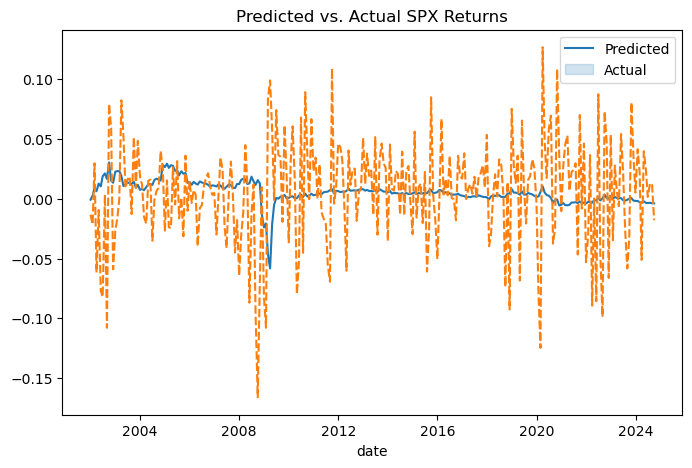

In [133]:
forecast_returns_df = pd.concat(forecast_returns)
forecast_returns_comp = pd.concat([forecast_returns_df,  df_excess_returns['SPY'].shift(-1).dropna()], axis = 1).dropna()

print("The predicted returns do not match actual return volatility because the signals are highly autocorrelated and slow-moving.\n"
      "Forecast errors (see above graph) are essentially SPX - 0.")
plt.figure(figsize=(8, 5)); sns.lineplot(data=forecast_returns_comp); plt.title('Predicted vs. Actual SPX Returns')
plt.legend(labels=["Predicted", "Actual"]); plt.show()